In [ ]:
import torch
import torch.nn as nn

def loss(S, T, gamma = 1):
    N = S.shape[0]  # Batch size
    loss = (gamma / N) * torch.sum((S - T) ** 2)
    return loss


def total_loss(S_s, T_s, S_m, T_m, S_l, T_l, gamma):
    L_s = loss(S_s, T_s, gamma)
    L_m = loss(S_m, T_m)
    L_l = loss(S_l, T_l)
    return L_s + L_m + L_l


# 가상의 모델 출력 (예제)
batch_size, H, W, C = 4, 32, 32, 64

S_s = torch.randn(batch_size, H, W, C)
T_s = torch.randn(batch_size, H, W, C)
S_m = torch.randn(batch_size, H, W, C)
T_m = torch.randn(batch_size, H, W, C)
S_l = torch.randn(batch_size, H, W, C)
T_l = torch.randn(batch_size, H, W, C)

gamma = 0.05

# 손실 계산
loss = total_loss(S_s, T_s, S_m, T_m, S_l, T_l, gamma)
print(f'Total Loss: {loss.item()}')

In [ ]:
# KL divergence between two distributions test

import numpy as np
import torch
import torch.functional as F

# feature map (bs, h, w, c)
input = np.random.rand(4, 512, 20, 20)
target = np.random.rand(4, 512, 20, 20)

input = torch.softmax(torch.tensor(input), dim=-1)

# KL divergence
kl_div = torch.nn.KLDivLoss(reduction='batchmean')
loss = 

In [8]:
import torch
import torch.nn.functional as F
from scipy.spatial import distance
import numpy as np

def js_divergence(p, q):
    """
    Compute the Jensen-Shannon Divergence between two probability distributions.
    """
    m = 0.5 * (p + q)
    return 0.5 * (F.kl_div(p.log(), m, reduction='batchmean') + F.kl_div(q.log(), m, reduction='batchmean'))

def compute_js_distance(tensor1, tensor2):
    """
    Compute the Jensen-Shannon distance between two tensors.
    """
    # Reshape tensors to 2D
    tensor1 = tensor1.view(tensor1.size(0), -1)
    tensor2 = tensor2.view(tensor2.size(0), -1)

    # Convert tensors to probability distributions
    p = F.softmax(tensor1, dim=1)
    q = F.softmax(tensor2, dim=1)

    # Compute the JS divergence
    js_div = js_divergence(p, q)

    # Convert divergence to distance
    js_distance = torch.sqrt(js_div)
    return js_distance

# Example tensors
tensor1 = torch.randn(4, 256, 84, 84)
tensor2 = torch.randn(4, 256, 84, 84)


# Compute the JS distance
js_distance = compute_js_distance(tensor1, tensor2)
print(js_distance.item())
js_distance = compute_js_distance(tensor2, tensor1)
print(js_distance.item())

0.5468700528144836
0.5468700528144836


In [10]:
import torch

ta= torch.randn(4, 256, 20, 20)
tb = torch.randn(4, 256, 20, 20)

print("---------------")

t1 = torch.softmax(ta, dim=1)
t2 = torch.softmax(tb, dim=1)

print(t1.shape, t2.shape)
print(t1.sum(dim=1).shape, t2.sum(dim=1).shape)
print(t1.sum(dim=1), t2.sum(dim=1)) 

print("---------------")

t3 = ta.view(ta.size(0), ta.size(1), -1)
t4 = tb.view(tb.size(0), tb.size(1), -1)
t3 = torch.softmax(t3, dim=1)
t4 = torch.softmax(t4, dim=1)

print(t3.shape, t4.shape)
print(t3.sum(dim=1).shape, t4.sum(dim=1).shape)
print(t3.sum(dim=1), t4.sum(dim=1))

---------------
torch.Size([4, 256, 20, 20]) torch.Size([4, 256, 20, 20])
torch.Size([4, 20, 20]) torch.Size([4, 20, 20])
tensor([[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
 

Using cache found in /home/hslee/.cache/torch/hub/ultralytics_yolov5_master


requirements: Ultralytics requirements ['requests>=2.32.0', 'setuptools>=70.0.0'] not found, attempting AutoUpdate...
requirements: ❌ AutoUpdate skipped (offline)


YOLOv5 🚀 2024-8-8 Python-3.11.7 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)

100%|██████████| 14.1M/14.1M [00:01<00:00, 11.8MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


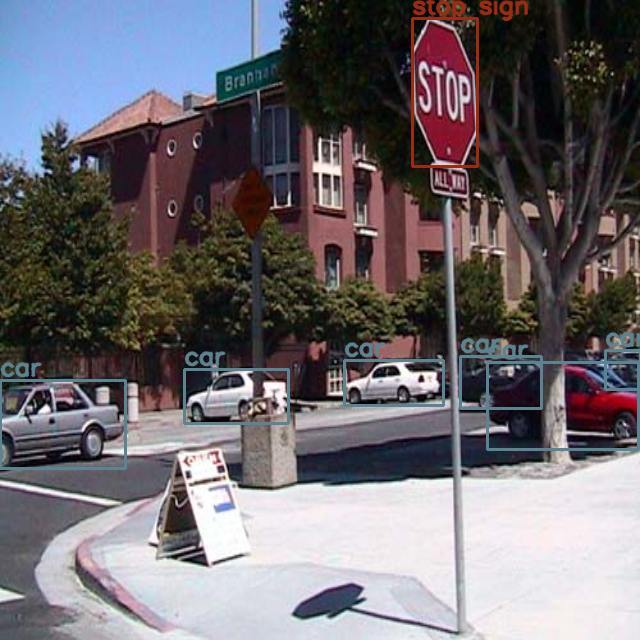

In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import torch    
import cv2
import numpy as np
import requests
import torchvision.transforms as transforms
from pytorch_grad_cam import EigenCAM
from pytorch_grad_cam.utils.image import show_cam_on_image, scale_cam_image
from PIL import Image

COLORS = np.random.uniform(0, 255, size=(80, 3))

def parse_detections(results):
    detections = results.pandas().xyxy[0]
    detections = detections.to_dict()
    boxes, colors, names = [], [], []

    for i in range(len(detections["xmin"])):
        confidence = detections["confidence"][i]
        if confidence < 0.2:
            continue
        xmin = int(detections["xmin"][i])
        ymin = int(detections["ymin"][i])
        xmax = int(detections["xmax"][i])
        ymax = int(detections["ymax"][i])
        name = detections["name"][i]
        category = int(detections["class"][i])
        color = COLORS[category]

        boxes.append((xmin, ymin, xmax, ymax))
        colors.append(color)
        names.append(name)
    return boxes, colors, names


def draw_detections(boxes, colors, names, img):
    for box, color, name in zip(boxes, colors, names):
        xmin, ymin, xmax, ymax = box
        cv2.rectangle(
            img,
            (xmin, ymin),
            (xmax, ymax),
            color, 
            2)

        cv2.putText(img, name, (xmin, ymin - 5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2,
                    lineType=cv2.LINE_AA)
    return img


image_url =  "https://farm1.staticflickr.com/6/9606553_ccc7518589_z.jpg"
img = np.array(Image.open(requests.get(image_url, stream=True).raw))
img = cv2.resize(img, (640, 640))
rgb_img = img.copy()
img = np.float32(img) / 255
transform = transforms.ToTensor()
tensor = transform(img).unsqueeze(0)

model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)
model.eval()
model.cpu()
target_layers = [model.model.model.model[-2]]

results = model([rgb_img])
boxes, colors, names = parse_detections(results)
detections = draw_detections(boxes, colors, names, rgb_img.copy())
Image.fromarray(detections)

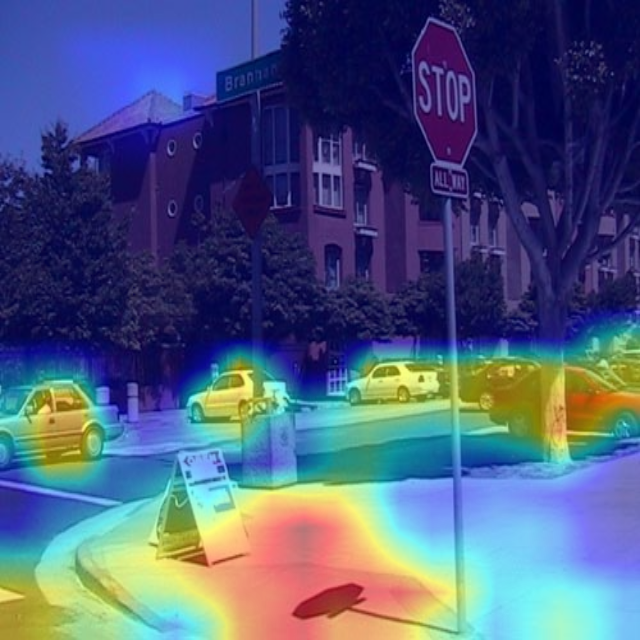

In [3]:
cam = EigenCAM(model, target_layers)
grayscale_cam = cam(tensor)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
Image.fromarray(cam_image)

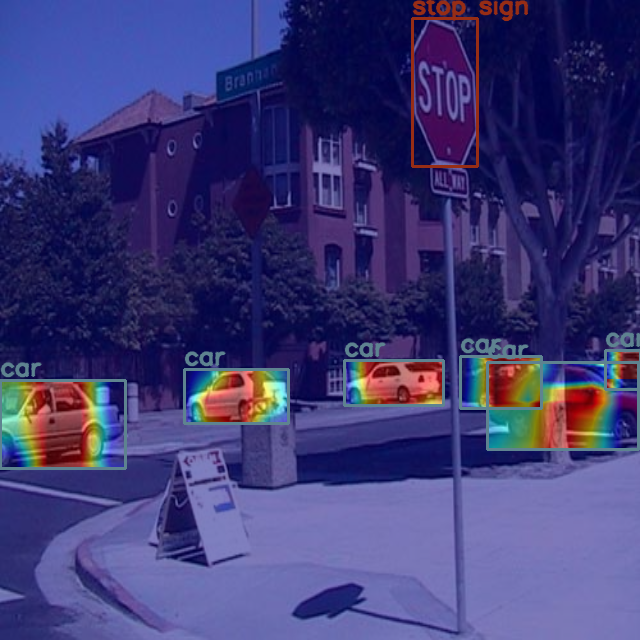

In [4]:
def renormalize_cam_in_bounding_boxes(boxes, colors, names, image_float_np, grayscale_cam):
    """Normalize the CAM to be in the range [0, 1] 
    inside every bounding boxes, and zero outside of the bounding boxes. """
    renormalized_cam = np.zeros(grayscale_cam.shape, dtype=np.float32)
    for x1, y1, x2, y2 in boxes:
        renormalized_cam[y1:y2, x1:x2] = scale_cam_image(grayscale_cam[y1:y2, x1:x2].copy())    
    renormalized_cam = scale_cam_image(renormalized_cam)
    eigencam_image_renormalized = show_cam_on_image(image_float_np, renormalized_cam, use_rgb=True)
    image_with_bounding_boxes = draw_detections(boxes, colors, names, eigencam_image_renormalized)
    return image_with_bounding_boxes


renormalized_cam_image = renormalize_cam_in_bounding_boxes(boxes, colors, names, img, grayscale_cam)
Image.fromarray(renormalized_cam_image)